In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.CAMVID_TINY)
print(path)

C:\Users\User\.fastai\data\camvid_tiny


In [7]:
# data loader
dls = SegmentationDataLoaders.from_label_func(
    path
    ,bs=8
    ,fnames = get_image_files(path/"images")
    ,label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}'
    ,codes = np.loadtxt(path/'codes.txt', dtype=str)
).cuda()

# load model
learn = unet_learner(dls, resnet34)

#fine tune
learn.fine_tune(16)

epoch,train_loss,valid_loss,time
0,2.861612,2.399741,00:01


epoch,train_loss,valid_loss,time
0,1.921586,1.538847,00:01
1,1.601519,1.319170,00:01
2,1.415199,1.071806,00:01
3,1.292219,1.305860,00:01
4,1.241762,1.097146,00:01
5,1.149775,0.843532,00:01
6,1.047009,0.743896,00:01
7,0.952486,0.769084,00:01
8,0.874811,0.729305,00:01
9,0.808916,0.703032,00:01


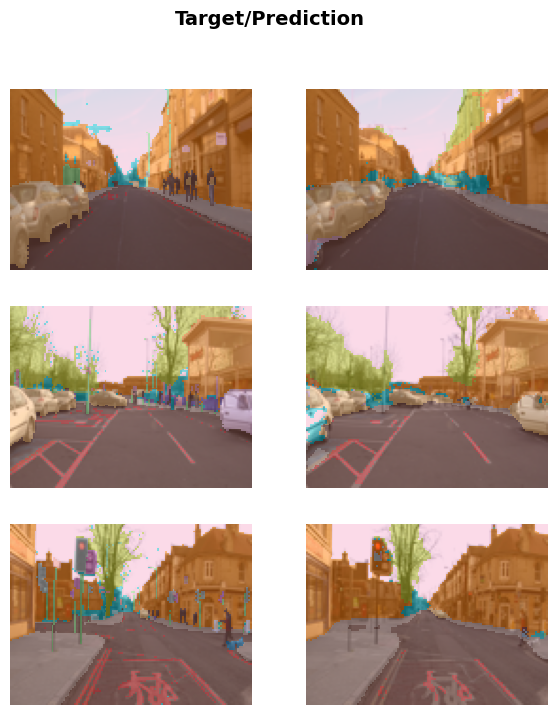

In [10]:
learn.show_results(max_n=3, figsize=(7,8))